# 2. 출생아 수 및  합계 출산율
한 여자가 가임기간(15 ~ 49세)에 낳을 것으로 기대되는 평균 출생아 수

In [6]:
import pandas as pd

# 필요있는 데이터만 불러오기
'''
1, 2행 제외 (3행부터 5행까지만 필요) --> skiprows=2
3~5행에서 3행은 Column header역할이기 떄문에 4,5행 data를 가져오기 위해서 --> nrows=2
'''
year = 2023
file_name = '142801_20230209121237712_excel.xlsx'
df = pd.read_excel(file_name, skiprows=2, nrows=2, index_col=0)
df

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
출생아 수,484.600,436.500,435.400,438.400,406.200,357.800,326.800,302.700,272.300,260.600
합계 출산율,1.297,1.187,1.205,1.239,1.172,1.052,0.977,0.918,0.837,0.808


In [8]:
df.index.values  # \xa0  -> (unicode) 공백

array(['출생아\xa0수', '합계\xa0출산율'], dtype=object)

In [10]:
df.rename(index={'출생아\xa0수' : '출생아 수', '합계\xa0출산율' : '합계 출산율'}, inplace=True)

In [11]:
df.index.values

array(['출생아 수', '합계 출산율'], dtype=object)

In [12]:
df.loc['출생아 수']
# == df.iloc[0] 

2012    484.6
2013    436.5
2014    435.4
2015    438.4
2016    406.2
2017    357.8
2018    326.8
2019    302.7
2020    272.3
2021    260.6
Name: 출생아 수, dtype: float64

In [18]:
# Row와 Column 위치 서로 바꾸기
df = df.T
df

,출생아 수,합계 출산율
2012,484.6,1.297
2013,436.5,1.187
2014,435.4,1.205
2015,438.4,1.239
2016,406.2,1.172
2017,357.8,1.052
2018,326.8,0.977
2019,302.7,0.918
2020,272.3,0.837
2021,260.6,0.808


## 데이터 시각화

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
# matplotlib.rcParams['font.family'] = 'Malgun Gothic' # Windows
matplotlib.rcParams['font.family'] = 'AppleGothic' # Mac
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False

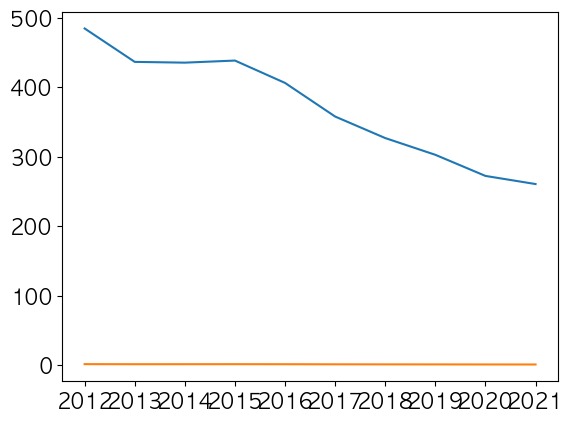

In [22]:
plt.plot(df.index, df['출생아 수'])
plt.plot(df.index, df['합계 출산율'])

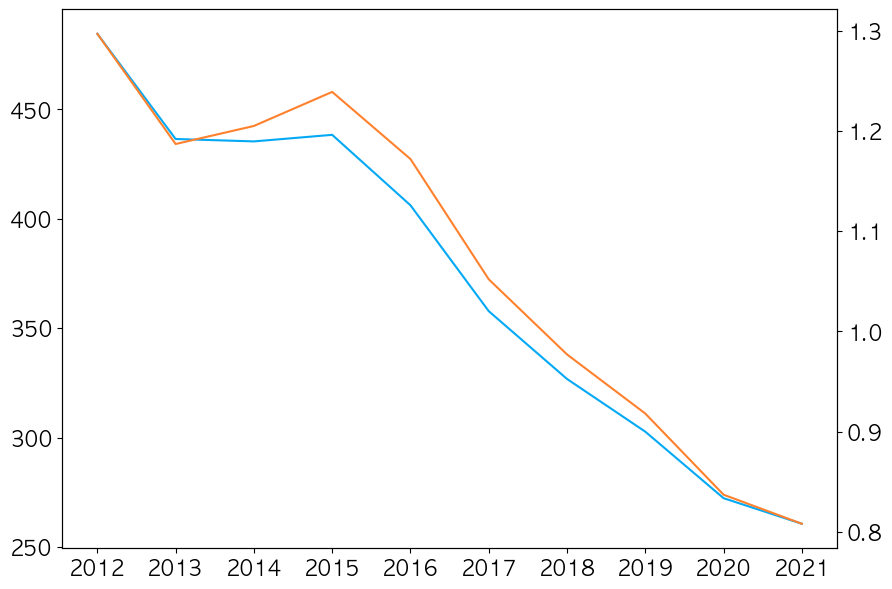

In [31]:
fig, ax1 = plt.subplots(figsize=(10, 7))
ax1.plot(df.index, df['출생아 수'], color='#03A9F5')

ax2 = ax1.twinx() # x축을 공유하는 쌍둥이 axis (서로 다른 데이터를 하나의 x축에 나타내기 위함)
ax2.plot(df.index, df['합계 출산율'], color='#ff812d')

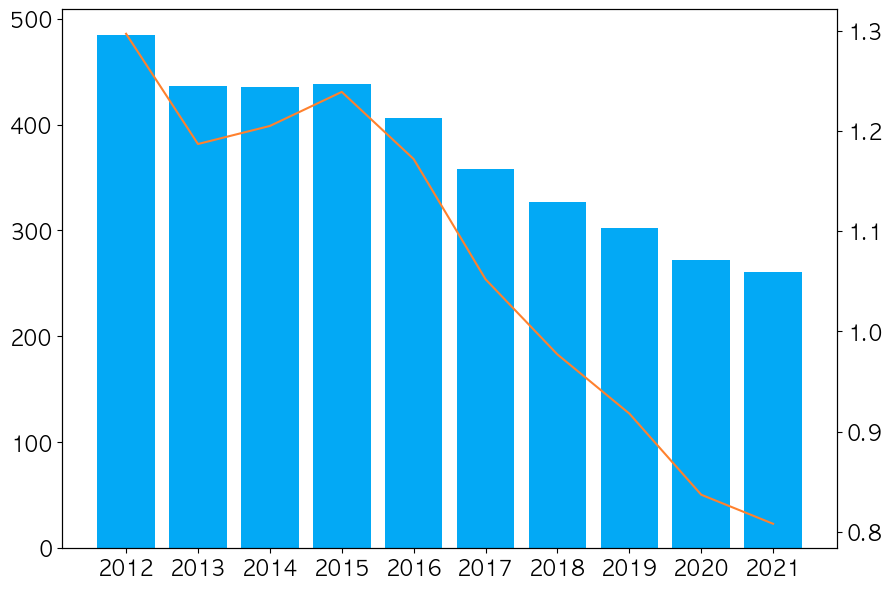

In [30]:
fig, ax1 = plt.subplots(figsize=(10, 7))
ax1.bar(df.index, df['출생아 수'], color='#03A9F5')

ax2 = ax1.twinx() # x축을 공유하는 쌍둥이 axis (서로 다른 데이터를 하나의 x축에 나타내기 위함)
ax2.plot(df.index, df['합계 출산율'], color='#ff812d')

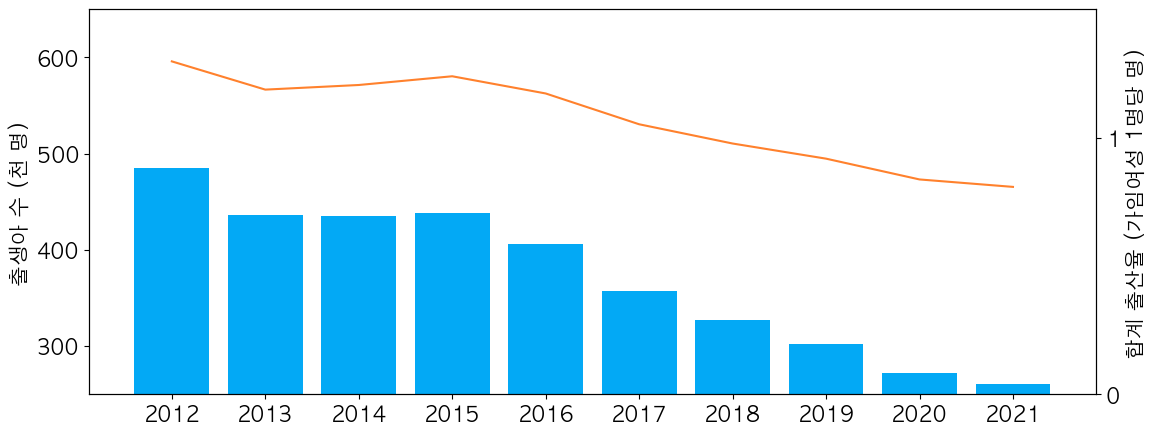

In [36]:
fig, ax1 = plt.subplots(figsize=(13, 5))
ax1.set_ylabel('출생아 수 (천 명)')
ax1.set_ylim(250, 650)
ax1.set_yticks([300, 400, 500, 600])
ax1.bar(df.index, df['출생아 수'], color='#03A9F5')

ax2 = ax1.twinx() 
ax2.set_ylabel('합계 출산율 (가임여성 1명당 명)')
ax2.set_ylim(0, 1.5)
ax2.set_yticks([0, 1])
ax2.plot(df.index, df['합계 출산율'], color='#ff812d')

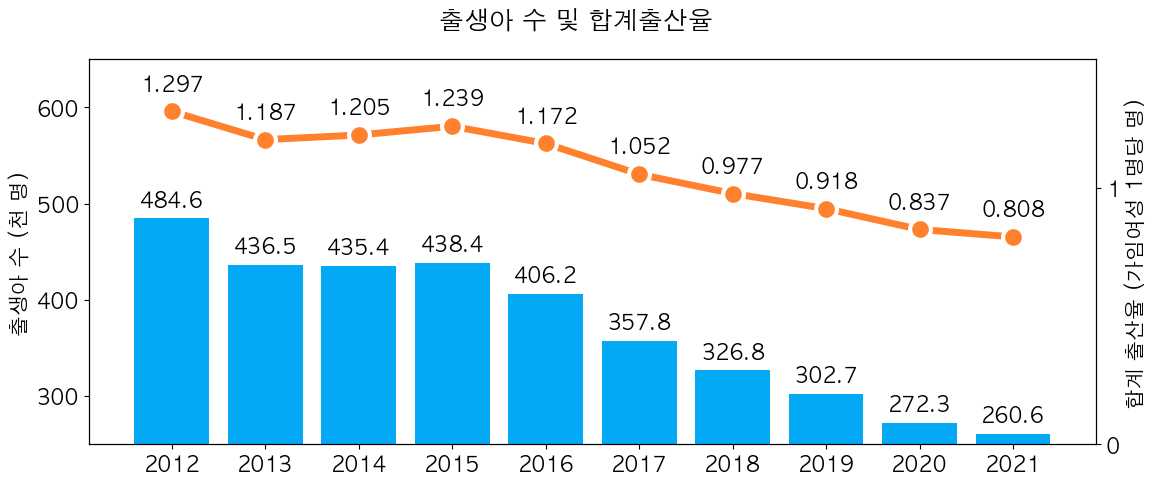

In [54]:
fig, ax1 = plt.subplots(figsize=(13, 5))
fig.suptitle('출생아 수 및 합계출산율')

ax1.set_ylabel('출생아 수 (천 명)')
ax1.set_ylim(250, 650)
ax1.set_yticks([300, 400, 500, 600])
ax1.bar(df.index, df['출생아 수'], color='#03A9F5')
for idx, val in enumerate(df['출생아 수']) :
    ax1.text(idx, val+12, val, ha='center')

ax2 = ax1.twinx() 
ax2.set_ylabel('합계 출산율 (가임여성 1명당 명)')
ax2.set_ylim(0, 1.5)
ax2.set_yticks([0, 1])
ax2.plot(df.index, df['합계 출산율'], color='#ff812d', marker='o', ms=15, lw=5, mec='w', mew=3)
for idx, val in enumerate(df['합계 출산율']) :
    ax2.text(idx, val+0.08, val, ha='center')